<a href="https://colab.research.google.com/github/felixlys/KalmanFilterApplication/blob/main/HIVModel_Terbaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(5, 366)


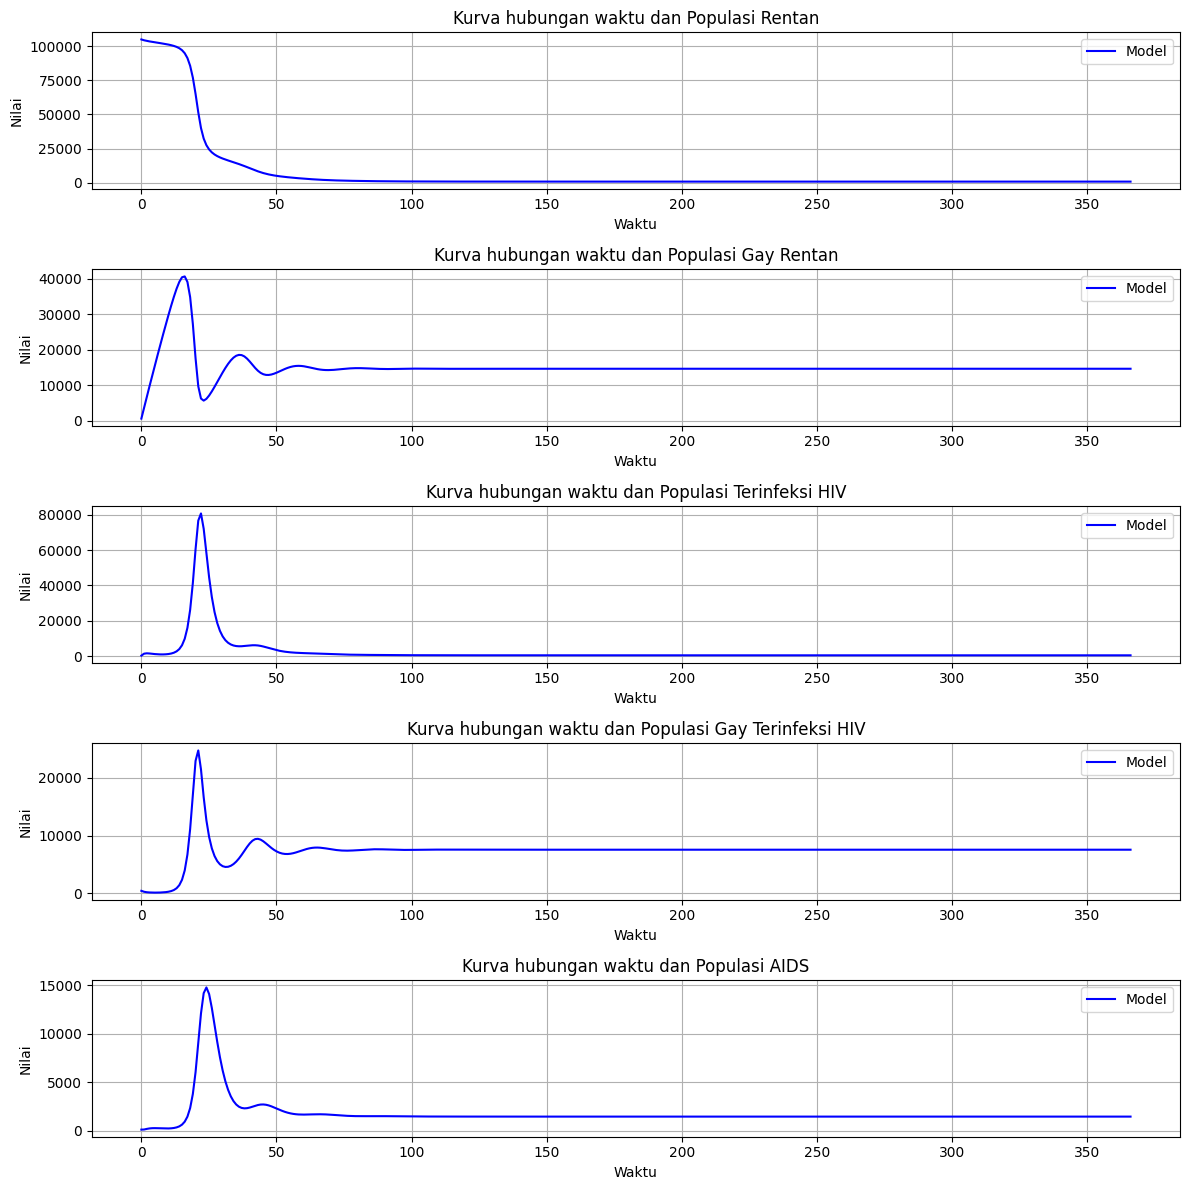

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x_iterasi = np.zeros((5,366))
T = 365  # Waktu total
dt = 1  # Delta t
maxk = int(T / dt)
N=104811+631+296+432+100
phi1=63
phi2=3082
alpha1=0.95
alpha2=2.85
beta=0.06
mu1=0.00267
mu2=0.3333
# Inisialisasi X awal
x_iterasi[:, 0] = np.array([104811,631,296,432,100])

# Momath HIV dengan noise Sistem
for t in range(1, T+1):
    #Menghitung S(Suspectible)
    x_iterasi[0, t] = x_iterasi[0, t-1]+dt*(phi1-x_iterasi[0, t-1]*(alpha1*((x_iterasi[3,t-1]/N)+mu1)))
    #Menghitung Sg(Suspectible Gay)
    x_iterasi[1, t] = x_iterasi[1, t-1]+dt*(phi2-x_iterasi[1, t-1]*(alpha2*((x_iterasi[3,t-1]/N)+mu1)))
    #Menghitung I(Infected non Gay)
    x_iterasi[2, t] = x_iterasi[2, t-1]+dt*(alpha2*x_iterasi[0, t-1]*(x_iterasi[3,t-1]/N)-x_iterasi[2, t-1]*(mu2+beta))
    #Menghitung Ig(Infected Gay)
    x_iterasi[3, t] = x_iterasi[3, t-1]+dt*(alpha2*x_iterasi[1, t-1]*(x_iterasi[3,t-1]/N)-x_iterasi[3, t-1]*(mu2+beta))
    #menghitung Aids
    x_iterasi[4,t]= x_iterasi[4, t-1]+dt*(beta*x_iterasi[2, t-1]+beta*x_iterasi[3, t-1]-0.333*x_iterasi[4,t-1])
#Sistem
print(x_iterasi.shape)
fig, axes = plt.subplots(5, 1, figsize=(12, 12))
time = np.linspace(0, T + 1, 366)
#ambil nilai z
axes[0].plot(time, x_iterasi[0, :], label=f'Model', color='blue')
axes[0].set_title('Kurva hubungan waktu dan Populasi Rentan')
axes[0].set_xlabel('Waktu')
axes[0].set_ylabel('Nilai')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(time, x_iterasi[1, :], label=f'Model', color='blue')
axes[1].set_title('Kurva hubungan waktu dan Populasi Gay Rentan')
axes[1].set_xlabel('Waktu')
axes[1].set_ylabel('Nilai')
axes[1].grid(True)
axes[1].legend()

# Plot Infeksi dan Gay Terinfeksi dalam subplot kedua
axes[2].plot(time, x_iterasi[2, :], label=f'Model', color='blue')
axes[2].set_title('Kurva hubungan waktu dan Populasi Terinfeksi HIV')
axes[2].set_xlabel('Waktu')
axes[2].set_ylabel('Nilai')
axes[2].grid(True)
axes[2].legend()

# Plot AIDS dalam subplot ketiga
axes[3].plot(time, x_iterasi[3, :], label=f'Model', color='blue')
axes[3].set_title('Kurva hubungan waktu dan Populasi Gay Terinfeksi HIV')
axes[3].set_xlabel('Waktu')
axes[3].set_ylabel('Nilai')
axes[3].grid(True)
axes[3].legend()

axes[4].plot(time, x_iterasi[4, :], label=f'Model', color='blue')
axes[4].set_title('Kurva hubungan waktu dan Populasi AIDS')
axes[4].set_xlabel('Waktu')
axes[4].set_ylabel('Nilai')
axes[4].grid(True)
axes[4].legend()
plt.tight_layout()
plt.show()


In [ ]:
#titik kesetimbangan dan jacobian matrix
S_star=(N/0.95)*((63*N*2.85*(0.3333+0.06))/(3081*2.85-0.00267*N*N*(0.3333+0.06)-0.00267*N*2.85*(0.3333+0.06)))
Sq_star=(0.3333+0.06)*N/2.85
I_star=((63*N*2.85)/(3081*2.85-0.00267*N*N*(0.3333+0.06)-0.00267*N*2.85*(0.3333+0.06)))*(3081/(N*(0.3333+0.06))-0.00267*N/2.85)
Ig_star=(3081/(0.3333+0.06))-(0.00267*N/2.85)
A_star=(0.06/0.3333)*(Ig_star+I_star)
#baris1
j_11=1-dt*(0.00267+((0.95*I_star)/(N))-((0.95*S_star*I_star)/(N*N)))
j_12=0.95*dt*S_star*I_star/(N*N)
j_13=-1*dt*S_star*((1/N)-I_star/(N*N))
j_14=0.95*dt*S_star*I_star/(N*N)
j_15=0.95*dt*S_star*I_star/(N*N)
#baris2
j_21=2.85*dt*Sq_star*Ig_star/(N*N)
j_22=1-dt*(0.00267+(2.85*Ig_star)/(N)-(Sq_star*Ig_star)/(N*N))
j_23=2.85*dt*Sq_star*Ig_star/(N*N)
j_24=-1*dt*Sq_star*(1/N-I_star/(N*N))
j_25=2.85*dt*Sq_star*Ig_star/(N*N)
#baris3
j_31=dt*Ig_star*((1/N)-S_star/(N*N))
j_32=-1*2.85*dt*S_star*Ig_star/(N*N)
j_33=1-dt*((0.3333+0.06)-2.85*(Ig_star*S_star)/(N*N))
j_34=dt*2.85*S_star*((1/N)-Ig_star/(N*N))
j_35=-1*2.85*dt*S_star*Ig_star/(N*N)
#baris4
j_41=-1*2.85*dt*Sq_star*Ig_star/(N*N)
j_42=dt*2.85*Ig_star*((1/N)-Sq_star/(N*N))
j_43=-1*2.85*dt*Sq_star*Ig_star/(N*N)
j_44=1-dt*((0.3333+0.06)+2.85*(Sq_star*Ig_star)/(N*N)-2.85*Sq_star/(N))
j_45=-1*2.85*dt*Sq_star*Ig_star/(N*N)
#baris5
j_51=0
j_52=0
j_53=dt*0.06
j_54=0.06*dt
j_55=1-dt*0.3333

#jacobianmatrix
J=np.array([[j_11, j_12, j_13, j_14, j_15],
              [j_21, j_22, j_23, j_24, j_25],
              [j_31, j_32, j_33, j_34, j_35],
              [j_41, j_42, j_43, j_44, j_45],
              [j_51, j_52, j_53, j_54, j_55]])
print(J)

#baris1
j_11=1-dt*(mu1+((alpha1*Ig_star)/(N))-((alpha1*S_star*Ig_star)/(N*N)))
j_12=alpha1*dt*S_star*Ig_star/(N*N)
j_13=-1*dt*S_star*((1/N)-Ig_star/(N*N))
j_14=alpha1*dt*S_star*Ig_star/(N*N)
j_15=alpha1*dt*S_star*Ig_star/(N*N)
#baris2
j_21=alpha2*dt*Sq_star*Ig_star/(N*N)
j_22=1-dt*(mu1+(alpha2*Ig_star)/(N)-(Sq_star*Ig_star)/(N*N))
j_23=alpha2*dt*Sq_star*Ig_star/(N*N)
j_24=-1*dt*Sq_star*(1/N-I_star/(N*N))
j_25=alpha2*dt*Sq_star*Ig_star/(N*N)
#baris3
j_31=dt*Ig_star*((1/N)-S_star/(N*N))
j_32=-1*alpha2*dt*S_star*Ig_star/(N*N)
j_33=1-dt*((mu2+beta)-alpha2*(Ig_star*S_star)/(N*N))
j_34=dt*alpha2*S_star*((1/N)-Ig_star/(N*N))
j_35=-1*alpha2*dt*S_star*Ig_star/(N*N)
#baris4
j_41=-1*alpha2*dt*Sq_star*Ig_star/(N*N)
j_42=dt*alpha2*Ig_star*((1/N)-Sq_star/(N*N))
j_43=-1*alpha2*dt*Sq_star*Ig_star/(N*N)
j_44=1-dt*((mu2+beta)+alpha2*(Sq_star*Ig_star)/(N*N)-alpha2*Sq_star/(N))
j_45=-1*alpha2*dt*Sq_star*Ig_star/(N*N)
#baris5
j_51=0
j_52=0
j_53=dt*beta
j_54=beta*dt
j_55=1-dt*mu2

#jacobianmatrix
J=np.array([[j_11, j_12, j_13, j_14, j_15],
              [j_21, j_22, j_23, j_24, j_25],
              [j_31, j_32, j_33, j_34, j_35],
              [j_41, j_42, j_43, j_44, j_45],
              [j_51, j_52, j_53, j_54, j_55]])
print(J)

[[ 9.94943601e-01 -9.54482037e-04  6.65571611e-01 -9.54482037e-04
  -9.54482037e-04]
 [ 2.86237297e-02  7.99955083e-01  2.86237297e-02 -1.37791995e-01
   2.86237297e-02]
 [ 1.21290695e-01  1.38260150e-01  4.68439850e-01 -1.76148239e+00
   1.38260150e-01]
 [-2.86237297e-02  1.78794601e-01 -2.86237297e-02  9.71376270e-01
  -2.86237297e-02]
 [ 0.00000000e+00  0.00000000e+00  6.00000000e-02  6.00000000e-02
   6.66700000e-01]]
[[ 0.88210384 -0.04608672  0.618064   -0.04608672 -0.04608672]
 [ 0.02862373  0.79995508  0.02862373 -0.137792    0.02862373]
 [ 0.1212907   0.13826015  0.46843985 -1.76148239  0.13826015]
 [-0.02862373  0.1787946  -0.02862373  0.97137627 -0.02862373]
 [ 0.          0.          0.06        0.06        0.6667    ]]


In [ ]:
G=np.ones((1, 5))
x_noised = np.zeros((5, 366))
x_iterasi[:, 0] = np.array([104811,631,296,432,100])
for t in range(1, 366):
    Q=1e-2
    w=np.random.normal(0,Q)
    Gangguansist=np.dot(G,w)
    x_noised[0,t]=x_iterasi[0,t]+w
    x_noised[1,t]=x_iterasi[1,t]+w
    x_noised[2,t]=x_iterasi[2,t]+w
    x_noised[3,t]=x_iterasi[3,t]+w
    x_noised[4,t]=x_iterasi[4,t]+w
print(x_noised.shape)

(5, 366)


In [ ]:
#mengambil nilai z dan mensubtitusikan nya di kalman filter
z=np.vstack([x_noised[0,:],x_noised[2,:],x_noised[4,:]])
R= np.array([[1e+1, 0, 0],
              [0, 1e+1, 0],
              [0, 0, 1e+1]])
z[:,0]=np.array([104811, 296, 100])
for t in range(1, 3):
    # Menghitung Input
    random_vector = np.random.multivariate_normal(mean=[0, 0, 0], cov=R)
    # Menghitung X_iterasi
    z[:, t]=+random_vector
#mensubstitusikan kembali data dengan noise pengukuran ke sistem
x_noised1 =x_noised
x_noised1[0,:]=z[0,:]
x_noised1[2,:]=z[1,:]
x_noised1[4,:]=z[2,:]
z=z.T
print(z)

[[ 1.04811000e+05  2.96000000e+02  1.00000000e+02]
 [ 5.31773114e-01  1.18386664e+00 -2.71874885e+00]
 [-3.18607888e+00 -2.50583644e+00 -9.30744187e-01]
 ...
 [ 8.99331926e+02  4.63151349e+02  1.44426628e+03]
 [ 8.99340535e+02  4.63159957e+02  1.44427489e+03]
 [ 8.99331232e+02  4.63150655e+02  1.44426559e+03]]


MSE antara x_iterasi[0] dan xh_EKF[0]: 9162.27138
MSE antara x_iterasi[1] dan xh_EKF[1]: 3821.13821
MSE antara x_iterasi[2] dan xh_EKF[2]: 1086.76627
MSE antara x_iterasi[3] dan xh_EKF[3]: 4027.60345
MSE antara x_iterasi[4] dan xh_EKF[4]: 3748.62460


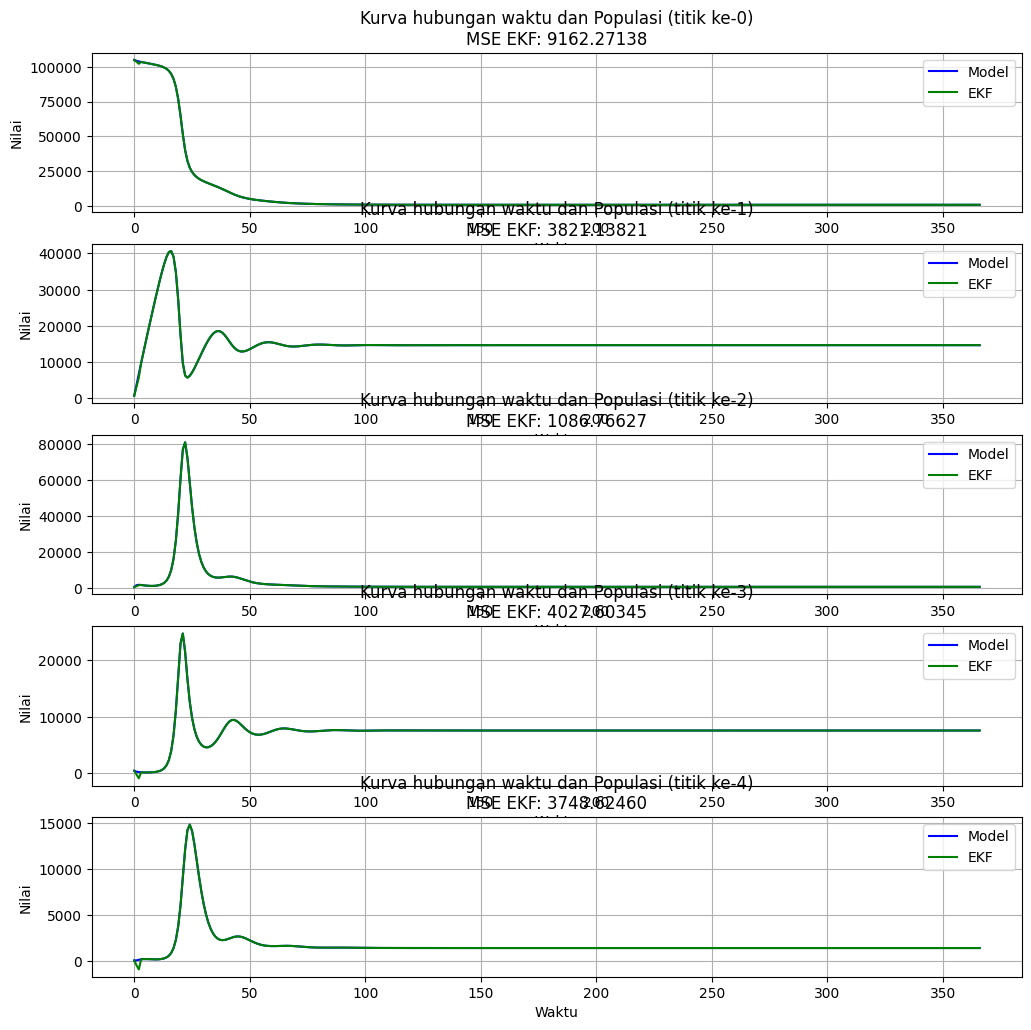

In [ ]:
#Algoritma Extended Kalman Filter
#Author  Felix Lyanto Setiawan #Matematika ITS
time = np.linspace(0, T + 1, 366)
xhmin_EKF=np.zeros((5, len(time)))
xhmin_EKF[:, 0] = np.array([104811,631,296,432,100])
xh_EKF=np.zeros((5, len(time)))
xh_EKF[:, 0] = np.array([104811,631,296,432,100])
P=(1e-2)*np.eye(5)
B=0
A=J
u=0
H=np.array([[1,0,0,0,0],
              [0,0,1,0,0],
              [0,0,0,0,1]])
#insinialisasi array untuk menyimpan MSE
mse_values = []
#inisialisasi array untuk memuat xhmin_kalman dan xh_kalman dan nilai dari waktu


for k in range(365):
    Pmin =np.dot(A, np.dot(P, A.T)) + Q * np.dot(G, G.T)
    xhmin_EKF[0,k+1] =  xhmin_EKF[0,k]+dt*(phi1- xhmin_EKF[0,k]*(alpha1*((xhmin_EKF[3,k]/N)+mu1)))
    #Menghitung Sg(Suspectible Gay)
    xhmin_EKF[1,k+1] = xhmin_EKF[1,k]+dt*(phi2-xhmin_EKF[1,k]*(alpha2*((xhmin_EKF[3,k]/N)+mu1)))
    #Menghitung I(Infected non Gay)
    xhmin_EKF[2,k+1] = xhmin_EKF[2,k]+dt*(alpha2*xhmin_EKF[0, k]*(xhmin_EKF[3,k]/N)-xhmin_EKF[2,k]*(mu2+beta))
    #Menghitung Ig(Infected Gay)
    xhmin_EKF[3, k+1] = xhmin_EKF[3,k]+dt*(alpha2*xhmin_EKF[1,k]*(xhmin_EKF[3,k]/N)-xhmin_EKF[3,k]*(mu2+beta))
    #menghitung Aids
    xhmin_EKF[4,k+1]= xhmin_EKF[4,k]+dt*(beta*xhmin_EKF[2,k]+beta*xhmin_EKF[3,k]-0.333*xhmin_EKF[4,k])
    K = np.dot(np.dot(Pmin, H.T), np.linalg.inv(np.dot(np.dot(H, Pmin), H.T)+R))
    xh_EKF[:, k + 1] = xhmin_EKF[:, k + 1] + np.dot(K, z[k + 1] - np.dot(H, xhmin_EKF[:, k + 1]))
    P = np.dot(np.identity(5) - np.dot(K, H), Pmin)
fig, axes = plt.subplots(5, 1, figsize=(12, 12))
mse_EKF=[]
for i in range(5):
    mse = np.mean((x_iterasi[i, :] - xh_EKF[i, :]) ** 2)
    mse_values.append(mse)
    print(f'MSE antara x_iterasi[{i}] dan xh_EKF[{i}]: {mse:.5f}')
    ax = axes[i]
    ax.plot(time, x_iterasi[i, :], label=f'Model', color='blue')
    ax.plot(time, xh_EKF[i, :], label=f'EKF', color='green')

    # Menambahkan MSE ke title
    mse_EKF = mse_values[i]
    ax.set_title(f'Kurva hubungan waktu dan Populasi (titik ke-{i})\nMSE EKF: {mse_EKF:.5f}')

    ax.set_xlabel('Waktu')
    ax.set_ylabel('Nilai')
    ax.grid(True)
    ax.legend()

In [ ]:
print(mse_EKF)

9.366679750683601e-07


MSE antara x_iterasi[0] dan xh_EKF[0]: 9162.27138
MSE antara x_iterasi[0] dan xh_kalman[0]: 165725055.98847
MSE antara x_iterasi[1] dan xh_EKF[1]: 3821.13821
MSE antara x_iterasi[1] dan xh_kalman[1]: 173465710.39196
MSE antara x_iterasi[2] dan xh_EKF[2]: 1086.76627
MSE antara x_iterasi[2] dan xh_kalman[2]: 9621990.61075
MSE antara x_iterasi[3] dan xh_EKF[3]: 4027.60345
MSE antara x_iterasi[3] dan xh_kalman[3]: 77983280.34680
MSE antara x_iterasi[4] dan xh_EKF[4]: 3748.62460
MSE antara x_iterasi[4] dan xh_kalman[4]: 43119549.91280


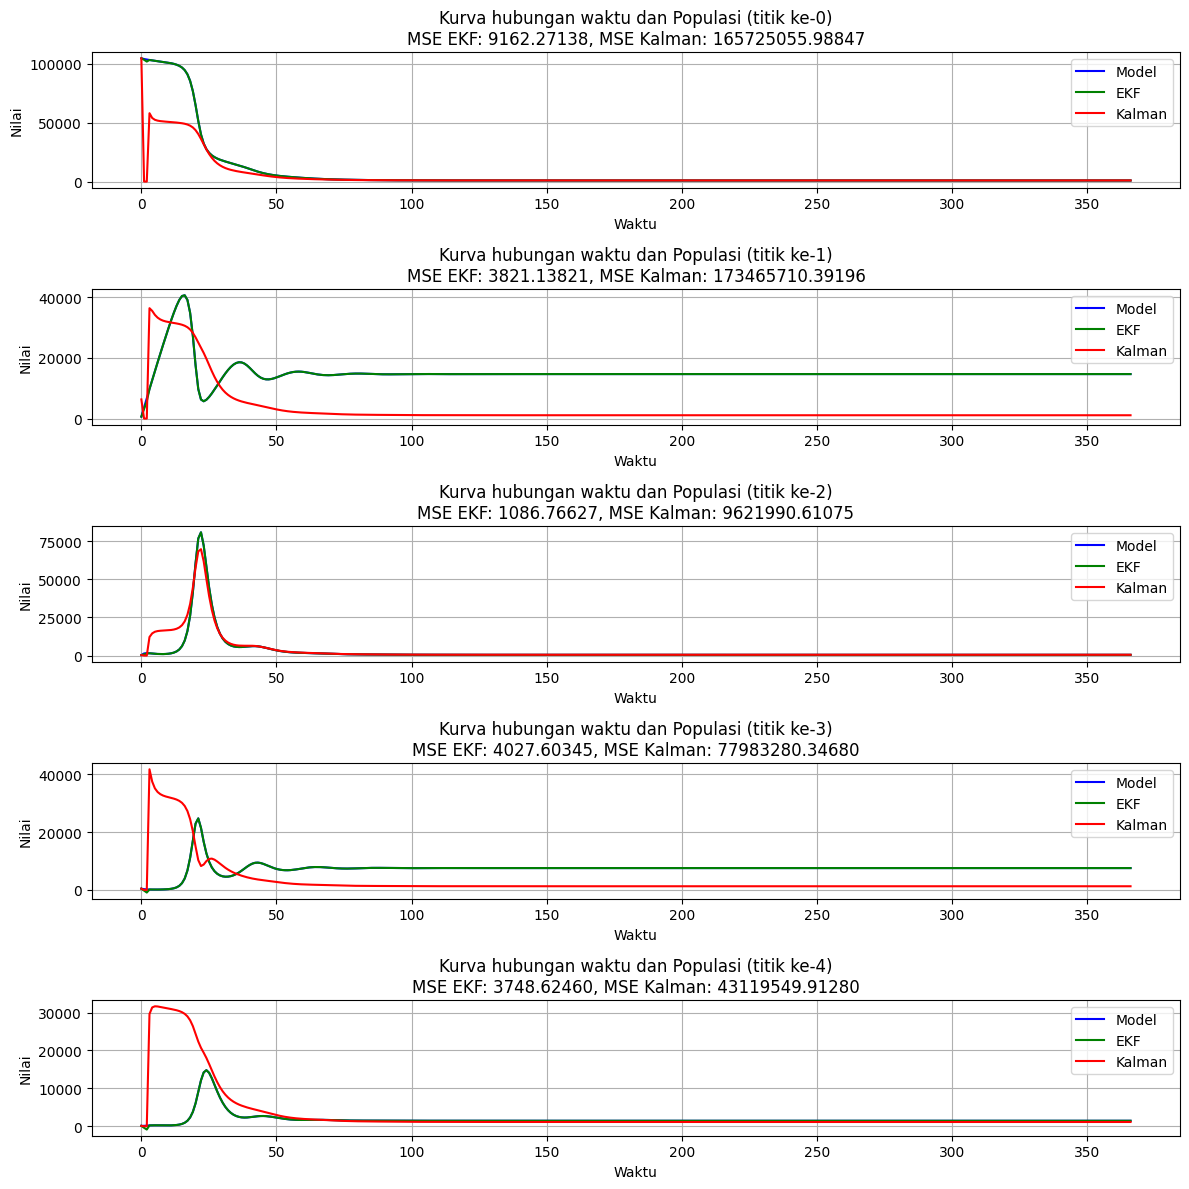

In [ ]:
#model Linier
#Model Hasil Pelinieran di Sekitar titik Kesetimbangan
A = J
x_linier = np.zeros((5,366))
T = 365  # Waktu total

x_linier[:, 0] =np.array([104811,6311,296,432,100])

# Iterasi dari t = 1 hingga t = 365
for t in range(1, T+1):
    x_linier[:, t] = np.dot(A, x_linier[:, t-1])

#model Linier dengan noise sistem
G=np.ones((1, 5))
x_linearnoised = np.zeros((5, 366))
x_linearnoised[:,0] = np.array([104811,6311,296,432,100])

for t in range(1, 366):
    Q=1e+1
    w=np.random.normal(0,Q)
    Gangguansist=np.dot(G,w)
    x_linearnoised[:, t] = np.dot(A, x_linearnoised[:, t-1])+Gangguansist

time = np.linspace(0, T+1, 366)
xhmin_kalman=np.zeros((5, len(time)))
xhmin_kalman[:,0] = np.array([104811,6311,296,432,100])
xh_kalman=np.zeros((5, len(time)))
xh_kalman[:,0] = np.array([104811,6311,296,432,100])
P=(1e+1)*np.eye(5)
B=0
u=0
H=np.array([[1,0,0,0,0],
              [0,0,1,0,0],
              [0,0,0,0,1]])
#insinialisasi array untuk menyimpan MSE
mse_values = []
#inisialisasi array untuk memuat xhmin_kalman dan xh_kalman dan nilai dari waktu


for k in range(1,365):
    Pmin =np.dot(A, np.dot(P, A.T)) + Q * np.dot(G, G.T)
    xhmin_kalman[:, k + 1] = np.dot(A, xhmin_kalman[:, k]) + np.dot(B, u)
    K = np.dot(np.dot(Pmin, H.T), np.linalg.inv(np.dot(np.dot(H, Pmin), H.T) +R))
    xh_kalman[:, k + 1] = xhmin_kalman[:, k + 1] + np.dot(K, z[k + 1] - np.dot(H, xhmin_kalman[:, k + 1]))
    P = np.dot(np.identity(5) - np.dot(K, H), Pmin)
fig, axes = plt.subplots(5, 1, figsize=(12, 12))
# ...
mse_values_EKF = []
mse_values_kalman = []

# ...

for i in range(5):
    mse_EKF = np.mean((x_iterasi[i, :] - xh_EKF[i, :]) ** 2)
    mse_kalman = np.mean((x_iterasi[i, :] - xh_kalman[i, :]) ** 2)
    mse_values_EKF.append(mse_EKF)
    mse_values_kalman.append(mse_kalman)
    print(f'MSE antara x_iterasi[{i}] dan xh_EKF[{i}]: {mse_EKF:.5f}')
    print(f'MSE antara x_iterasi[{i}] dan xh_kalman[{i}]: {mse_kalman:.5f}')

    ax = axes[i]
    ax.plot(time, x_iterasi[i, :], label=f'Model', color='blue')
    ax.plot(time, xh_EKF[i, :], label=f'EKF', color='green')
    ax.plot(time, xh_kalman[i, :], label=f'Kalman', color='red')  # Menambahkan plot untuk Kalman

    # Menambahkan MSE ke title
    mse_EKF_display = mse_values_EKF[i]
    mse_kalman_display = mse_values_kalman[i]
    ax.set_title(f'Kurva hubungan waktu dan Populasi (titik ke-{i})\nMSE EKF: {mse_EKF_display:.5f}, MSE Kalman: {mse_kalman_display:.5f}')

    ax.set_xlabel('Waktu')
    ax.set_ylabel('Nilai')
    ax.grid(True)
    ax.legend()

# ...

plt.tight_layout()
plt.show()

MSE antara x_iterasi[0] dan xh_EKF[0]: 9162.27138
MSE antara x_iterasi[0] dan xh_kalman[0]: 165725055.98847
MSE antara x_iterasi[0] dan xh_ENKF[0]: 59108049.17727
MSE antara x_iterasi[1] dan xh_EKF[1]: 3821.13821
MSE antara x_iterasi[1] dan xh_kalman[1]: 173465710.39196
MSE antara x_iterasi[1] dan xh_ENKF[1]: 432687007.50539
MSE antara x_iterasi[2] dan xh_EKF[2]: 1086.76627
MSE antara x_iterasi[2] dan xh_kalman[2]: 9621990.61075
MSE antara x_iterasi[2] dan xh_ENKF[2]: 16401.22425
MSE antara x_iterasi[3] dan xh_EKF[3]: 4027.60345
MSE antara x_iterasi[3] dan xh_kalman[3]: 77983280.34680
MSE antara x_iterasi[3] dan xh_ENKF[3]: 1055783.47717
MSE antara x_iterasi[4] dan xh_EKF[4]: 3748.62460
MSE antara x_iterasi[4] dan xh_kalman[4]: 43119549.91280
MSE antara x_iterasi[4] dan xh_ENKF[4]: 9048.64331


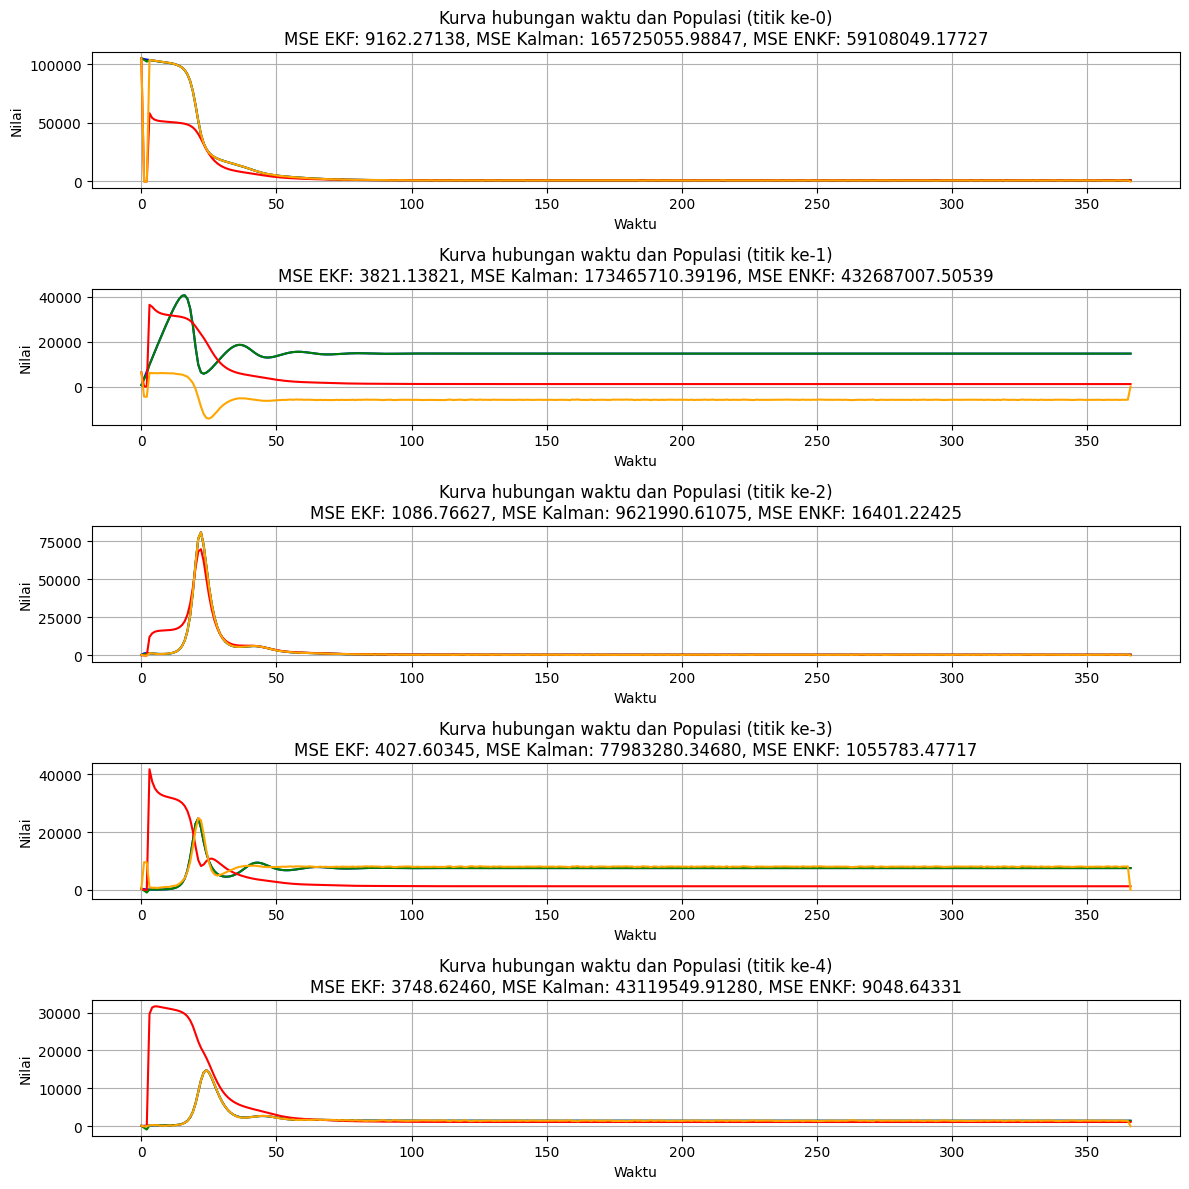

[[ 1.04811000e+05  1.03562314e+05  1.02035762e+05 ...  8.99330799e+02
   8.99335047e+02  8.99330457e+02]
 [ 6.31000000e+02  3.17955205e+03  5.66650427e+03 ...  1.46652602e+04
   1.46652607e+04  1.46652601e+04]
 [ 2.96000000e+02  8.23076822e+02  1.33032246e+03 ...  4.63149955e+02
   4.63153168e+02  4.63149696e+02]
 [ 4.32000000e+02 -2.39260246e+02 -9.12247882e+02 ...  7.55251619e+03
   7.55251533e+03  7.55251626e+03]
 [ 1.00000000e+02 -4.09703676e+02 -8.76107717e+02 ...  1.44426411e+03
   1.44426430e+03  1.44426409e+03]]


In [ ]:
#Ensemble Kalman Filter

#Author : Felix Lyanto Setiawan #Matematika ITS
time = np.linspace(0, T+1, 366)
N_1 = 1000  # banyaknya ensemble
P = (1e-2) * np.eye(5)
B = 0
A = J
u = 0
H = np.array([[1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1]])

# nilai z
z = np.vstack([x_noised[0, :], x_noised[2, :], x_noised[4, :]])
R = np.array([[1e+1, 0, 0],
              [0, 1e+1, 0],
              [0, 0, 1e+1]])
z[:, 0] = np.array([104811, 296, 100])

for t in range(1, 3):
    # Menghitung Input
    random_vector = np.random.multivariate_normal(mean=[0, 0, 0], cov=R)
    # Menghitung X_iterasi
    z[:, t] = z[:, t] + random_vector

# mensubstitusikan kembali data dengan noise pengukuran ke sistem
x_noised1 = x_noised.copy()
x_noised1[0, :] = z[0, :]
x_noised1[2, :] = z[1, :]
x_noised1[4, :] = z[2, :]
z=z.T

# nilai awal
G = np.ones((1, 5))
x0 = np.zeros(((N_1) + 1, 5))
x0[0, :] = np.array([104811, 6311, 296, 432, 100])
P = (1e-2) * np.eye(5)
x0ens = np.zeros(((N_1) + 1, 5))
x0ens[0, :] = x0[0, :]

# estimasi awal dengan
for ens in range(0, N_1):
    Q = 1e-2
    w = np.random.normal(0, Q)
    noise = np.dot(G, w)
    x0ens[ens + 1, :] = x0ens[ens, :] + noise

x0est = np.mean(x0ens[1:, :], axis=0)


# tahap prediksi dan koreksi
xhmin_enkf = np.zeros((5, 366))
xhmin_enkf[:, 0] = x0est
xh_enkf = np.zeros((5, 366))
xh_enkf[:, 0] = x0est
xh_ens = np.zeros(((N_1) + 1, 5))
for t in range(365):
    xh_ens[0,:]=x0est
    for ens in range(0, N_1):
        Q = 1e-2
        w = np.random.normal(0, Q)
        xh_ens[ens+1, 0] = xh_ens[ens, 0] + dt * (phi1 - xh_ens[ens, 0] * (alpha1 * ((xh_ens[ens, 3] / N) + mu1))) + w
        xh_ens[ens+1, 1] = xh_ens[ens, 1] + dt * (phi2 - xh_ens[ens, 1] * (alpha2 * ((xh_ens[ens, 3] / N) + mu1))) + w
        xh_ens[ens+1, 2] = xh_ens[ens, 2] + dt * (
                alpha2 * xh_ens[ens, 0] * (xh_ens[ens, 3] / N) - xh_ens[ens, 2] * (mu2 + beta)) + w
        xh_ens[ens+1, 3] = xh_ens[ens, 3] + dt * (
                alpha2 * xh_ens[ens, 1] * (xh_ens[ens, 3] / N) - xh_ens[ens, 3] * (mu2 + beta)) + w
        xh_ens[ens+1, 4] = xh_ens[ens, 4] + dt * (beta * xh_ens[ens, 2] + beta * xh_ens[ens, 3] - 0.333 * xh_ens[ens, 4]) + w

    xkmin = np.mean(xh_ens[1:, :], axis=0)  # vektor ensemble
    Pmin = np.zeros((5, 5))
    for i in range(1, N_1 + 1):
        xkmin_diff = xh_ens[i, :] - xkmin
        Pmin += np.outer(xkmin_diff, xkmin_diff)
    Pmin = (1 / (N_1 - 1)) * Pmin

    # tahap koreksi
    K = np.dot(np.dot(Pmin, H.T), np.linalg.inv(np.dot(np.dot(H, Pmin), H.T) + R))
    z_ens = np.zeros(((N_1) + 1, 3))
    z_ens[0, :] = z[t, :]
    for ens in range(0, N_1):
        # nilai z kolom
        random_vector = np.random.multivariate_normal(mean=[0, 0, 0], cov=R)
        z_ens[ens+1, :] = z_ens[ens, :] + random_vector
        z_pred = np.mean(xh_ens[1:, :], axis=0)
        xh_ens[ens+1, :] = xh_ens[ens, :] + np.dot(K, z_ens[ens, :] - np.dot(H,xh_ens[ens, :]))

    xh_enkf[:, t] = np.mean(xh_ens[1:, :], axis=0)
    P = np.dot(np.identity(5) - np.dot(K, H), Pmin)


mse_values_EKF = []
mse_values_kalman = []
mse_values_ENKF = []
fig, axes = plt.subplots(5, 1, figsize=(12, 12))

for i in range(5):
    mse_EKF = np.mean((x_iterasi[i, :] - xh_EKF[i, :]) ** 2)
    mse_kalman = np.mean((x_iterasi[i, :] - xh_kalman[i, :]) ** 2)
    mse_ENKF = np.mean((x_iterasi[i, :] - xh_enkf[i, :]) ** 2)
    mse_values_EKF.append(mse_EKF)
    mse_values_kalman.append(mse_kalman)
    mse_values_ENKF.append(mse_ENKF)
    print(f'MSE antara x_iterasi[{i}] dan xh_EKF[{i}]: {mse_EKF:.5f}')
    print(f'MSE antara x_iterasi[{i}] dan xh_kalman[{i}]: {mse_kalman:.5f}')
    print(f'MSE antara x_iterasi[{i}] dan xh_ENKF[{i}]: {mse_ENKF:.5f}')

    ax = axes[i]
    ax.plot(time, x_iterasi[i, :], label=f'Model', color='blue')
    ax.plot(time, xh_EKF[i, :], label=f'EKF', color='green')
    ax.plot(time, xh_kalman[i, :], label=f'Kalman', color='red')
    ax.plot(time, xh_enkf[i, :], label=f'ENKF', color='orange')  # Menambahkan plot untuk ENKF

    # Menambahkan MSE ke title
    mse_EKF_display = mse_values_EKF[i]
    mse_kalman_display = mse_values_kalman[i]
    mse_ENKF_display = mse_values_ENKF[i]
    ax.set_title(f'Kurva hubungan waktu dan Populasi (titik ke-{i})\nMSE EKF: {mse_EKF_display:.5f}, MSE Kalman: {mse_kalman_display:.5f}, MSE ENKF: {mse_ENKF_display:.5f}')

    ax.set_xlabel('Waktu')
    ax.set_ylabel('Nilai')
    ax.grid(True)

plt.tight_layout()
plt.show()
print(xh_EKF)


In [ ]:
print(z[2, :])

[-2.01152675  0.88775714  7.89851285]
